# Signal and Image Processing (SIP_SS24)

###  Hilbert Tutorial

### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Analytic Signal

### Define plot function

In [2]:
# Function for plotting the signal, with parameters x (signal) and t (time array)
def plot_x(x,t):
    
    # Define figure size
    plt.figure(figsize=(15,5))
    # Plot the signal x in seconds
    plt.plot(t,x)
    # Label the axes
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (a.u.)')
    # Show grid in plot
    plt.grid()
    # Show the plot
    plt.show()
    

### Generate a sine signal and plot it

In [3]:
# signal length (s)
T = 1
# sampling frequency in Hz
fs = 1000
# signal frequency in Hz
f = 1


# signal length (samples)
N = int(T*fs)
# generate samples indices array
n = np.arange(0, N)

# sine signal
x = np.sin(2*np.pi*f*n*1/fs)

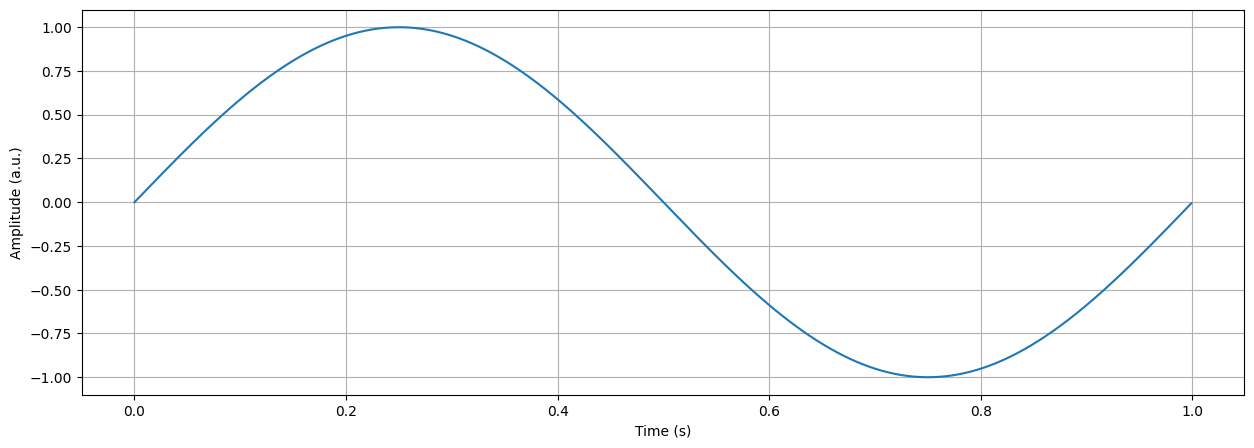

In [4]:
# Define time array
t = n * 1/fs

# Plot the signal x
plot_x(x,t)

### Calculate the analytic signal z

In [5]:
def analytic_signal(x):
    # DFT of signal x
    X = np.fft.fft(x)
    
    # Hilbert Transform
    # Define Half of the length of your spectrum X
    half_len = int(len(x)/2) 
    # Double the first half of your spectrum
    X[0:half_len] = 2*X[0:half_len]
    # Set the second half of the spectrum to 0
    X[half_len:] = 0
    
    # Get analytic signal via iDFT
    z = np.fft.ifft(X)
    
    return(z)


In [6]:
z = analytic_signal(x)

### Calculate and plot instantaneous amplitude, phase and frequency

In [7]:
def plot_z(z, t, fs, freq_lim = None):
    
    # Calculate instantaneous amplitude, and real and imaginary part of z
    real_z = np.real(z)
    imag_z = np.imag(z)
    inst_amp = np.abs(z)
    
    # Calculate instantaneous phase
    inst_phase = np.angle(z)
    
    # Calculate instantaneous frequency (convert from radians in Hz)
    inst_freq = np.diff(np.unwrap(inst_phase)) / (2*np.pi)*fs
    
    # Define figure size
    plt.figure(figsize=(15,10))
    
    # First Subplot with instantaneous amplitude, real and imaginary part of z
    plt.subplot(3,1,1)
    plt.plot(t, real_z, label='real')
    plt.plot(t, imag_z, label='imag')
    plt.plot(t, inst_amp, label='inst amp')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (a.u.)')
    plt.legend()
    plt.grid()
    
    # Second Subplot with instantaneous phase
    plt.subplot(3,1,2)
    plt.plot(t, inst_phase, label='inst phase', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (a.u.)')
    plt.legend()
    plt.grid()
    
    # Third Subplot with instantaneous frequency
    plt.subplot(3,1,3)
    plt.plot(t[1:], inst_freq, label='inst freq', color='purple')
    # Set y-lim to avoid rounding errors and computational artefacts
    if freq_lim is not None:
        plt.ylim(freq_lim)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (a.u.)')
    plt.legend()
    plt.grid()

### Plot analytic signal z in time domain

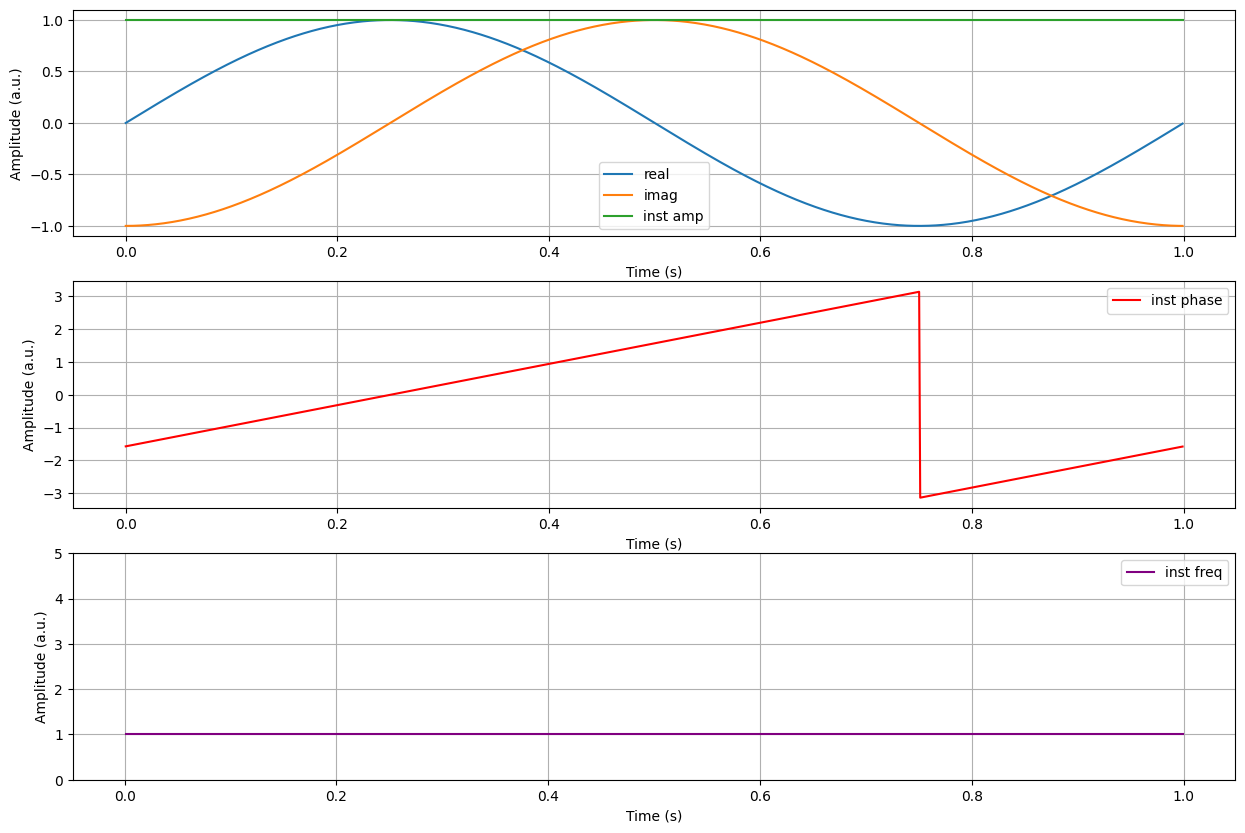

In [8]:
# Plot the instantaneous amplitude, phase and frequency  
plot_z(z, t, fs, [0,5])

### Plot analytic signal z in complex plane

In [9]:
def scatter_z(z):
    colors = cm.rainbow(np.linspace(0,1,len(z)))
    plt.figure(figsize=(10,10))
    plt.axhline(0, c='k')
    plt.axvline(0, c='k')
    plt.scatter(np.real(z), np.imag(z), color=colors)
    plt.xlabel('real(z)')
    plt.ylabel('imag(z)')
    plt.grid()
    plt.show()

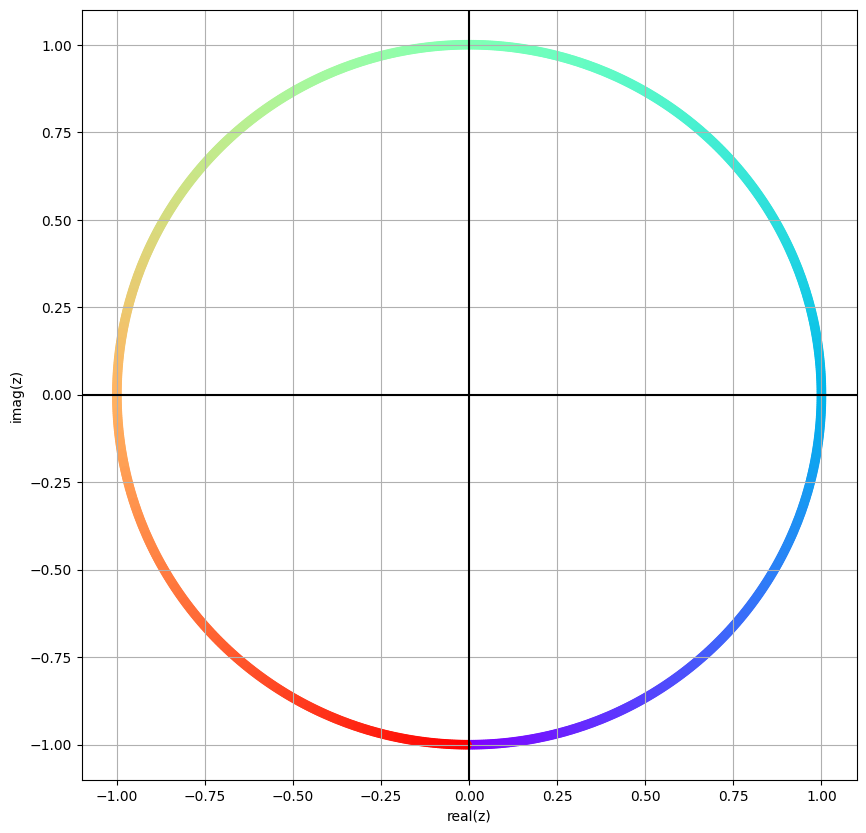

'\nThe signal starts at color purple\n'

In [10]:
# Scatter plot
scatter_z(z) 

'''
The signal starts at color purple
'''

### Signal with 2 frequency components

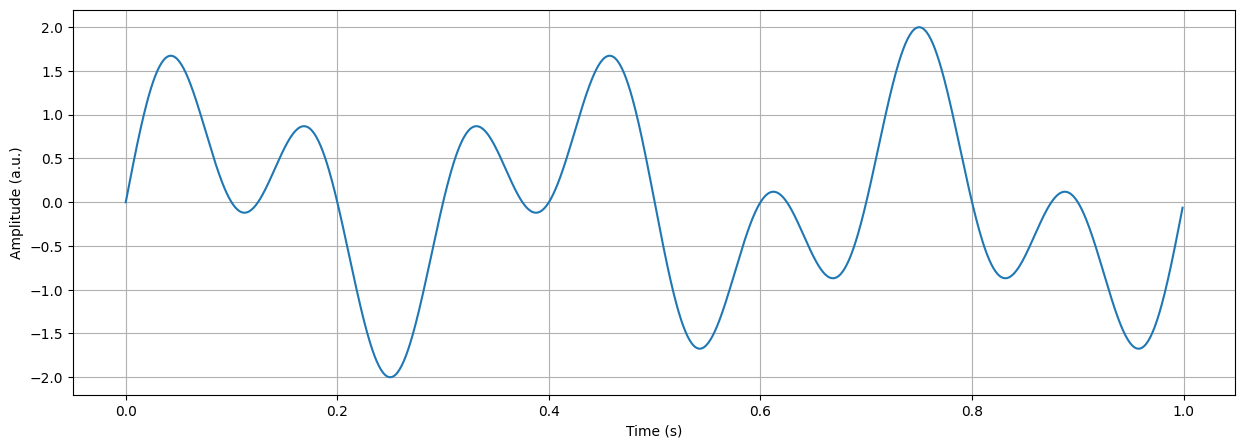

In [11]:
#Two frequency components
f1 = 7
f2 = 3

# Sum of two sine waves
x2 = np.sin(2*np.pi*f1/fs*n) + np.sin(2*np.pi*f2/fs*n)

# Plot the signal
plot_x(x2,t)

### Calculate and plot instantantaneous amplitude, phase and frequency of new signal

'\nSmaller jumps as well --> still spikes after unwrapping\n'

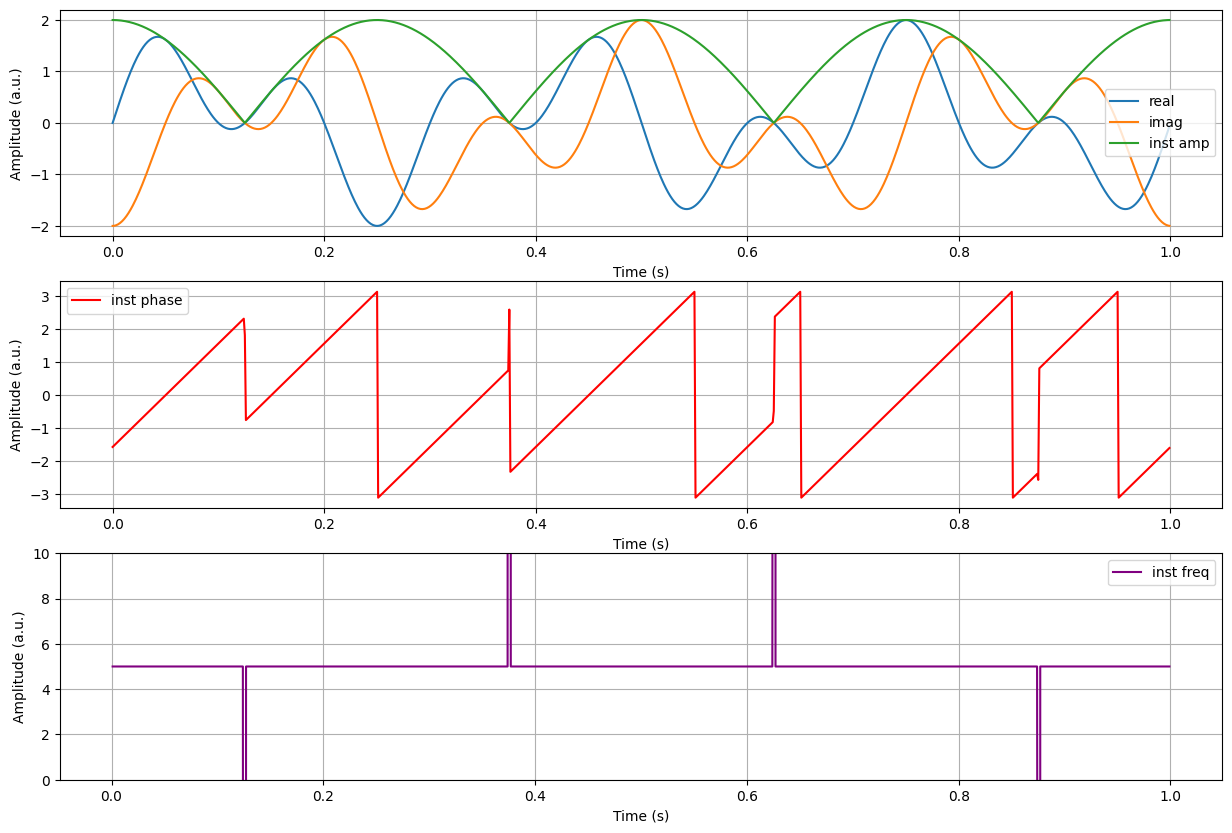

In [12]:
# Calculate z2
z2 = analytic_signal(x2)

# Plot inst ampl, phase and freq
plot_z(z2,t,fs,[0,10])

'''
Smaller jumps as well --> still spikes after unwrapping
'''

### Show complex plane

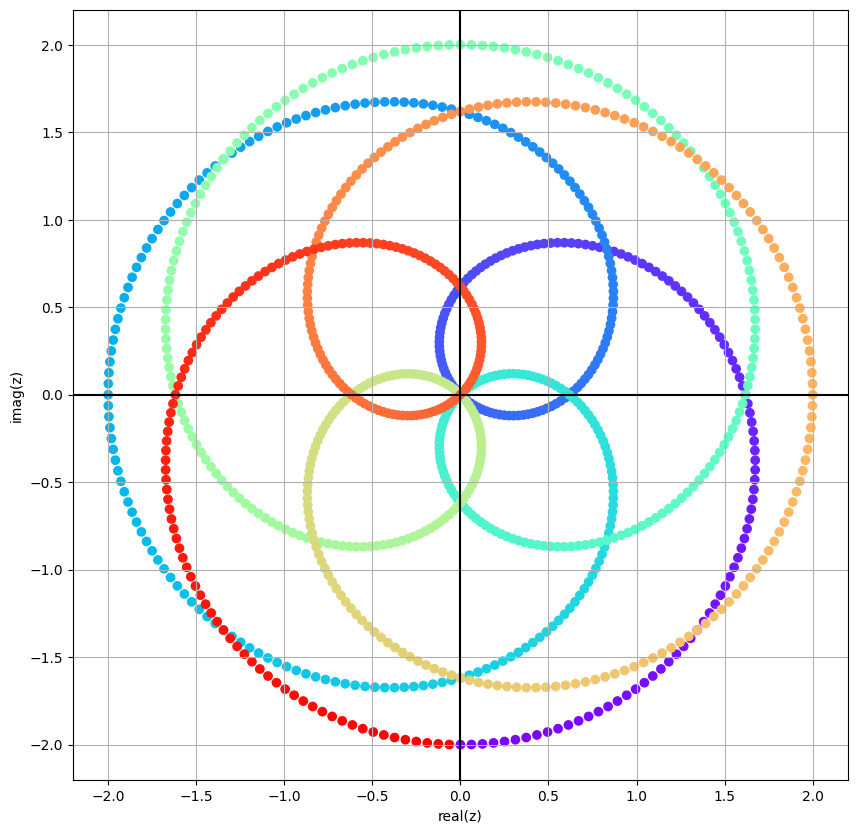

'\nsmall jumps --> crosses threw the center/origin (0,0)\n'

In [13]:
scatter_z(z2)

'''
small jumps --> crosses threw the center/origin (0,0)
'''

### More complex signal

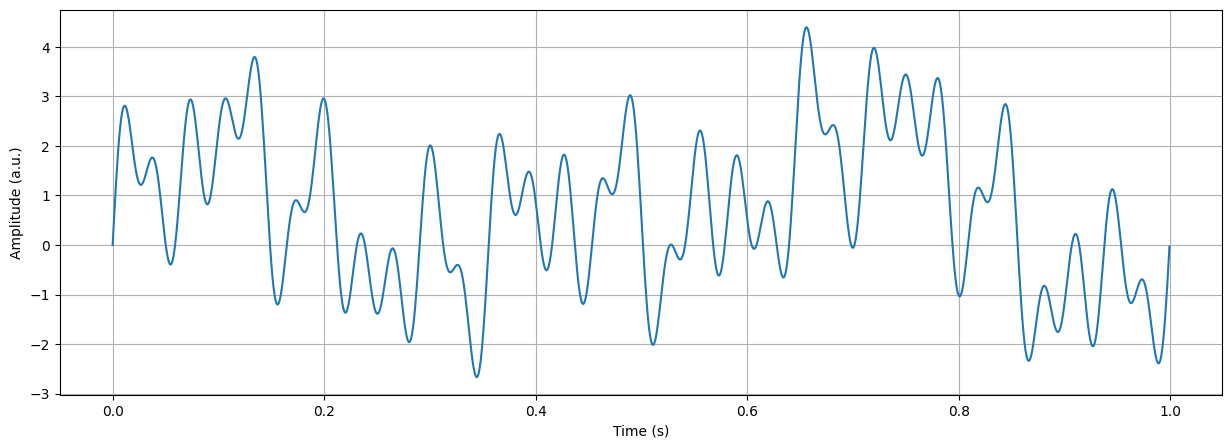

In [14]:
# Six frequency components
freqs = [0.3,1.9,3,11,17,31]

# Sum up the individual freq. components
x3 = np.zeros(N)
for f in freqs:
    x3 += np.sin(2*np.pi*f/fs*n)

# Plot the new signal
plot_x(x3,t)

### Calculate and plot instantantaneous amplitude, phase and frequency of new signal

'\nphase not linear any more --> goes down even without jumps --> negative frequencies \n--> not an error! --> direction in complex plane changes (compared to origin) \n--> dips into the negative --> small loops in complex plane\nnegative frequencies mean going the other way around in complex plane\n'

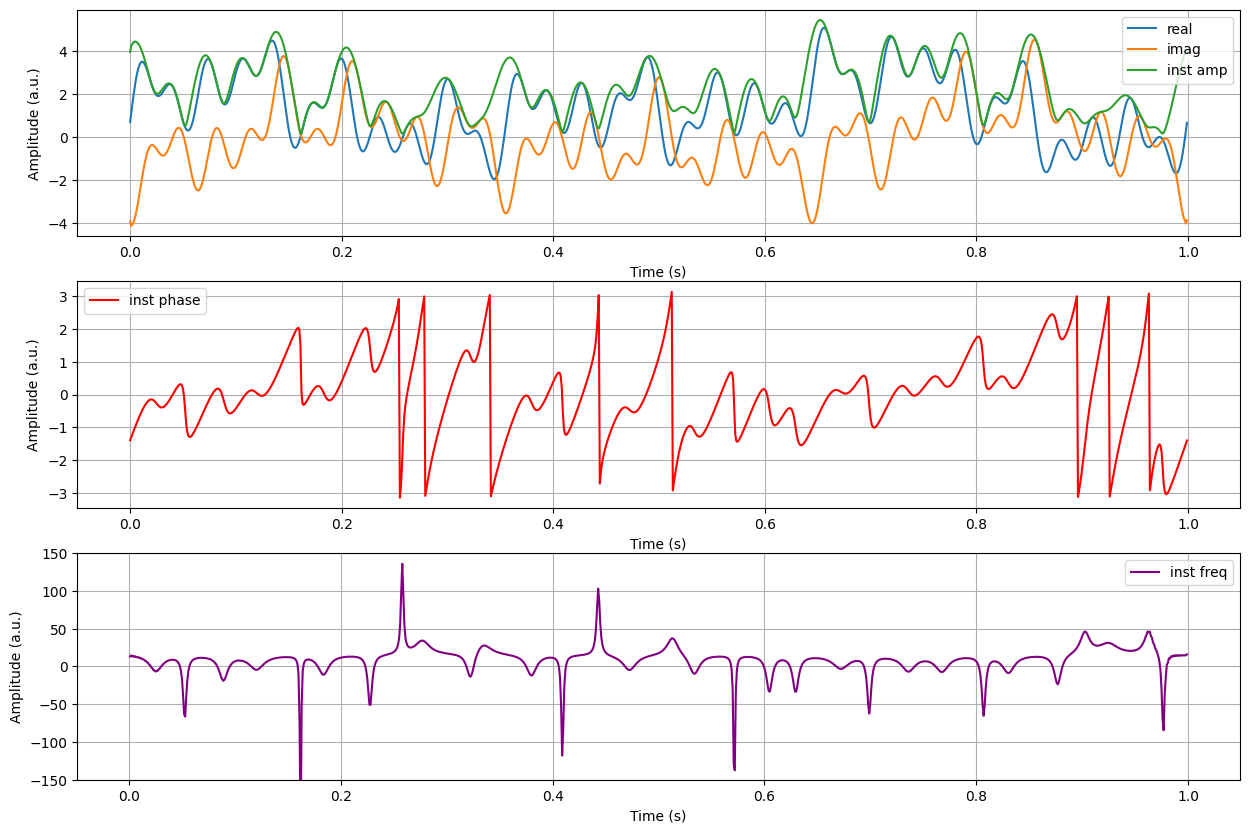

In [15]:
z3 = analytic_signal(x3)
plot_z(z3,t,fs,[-150,150])

'''
phase not linear any more --> goes down even without jumps --> negative frequencies 
--> not an error! --> direction in complex plane changes (compared to origin) 
--> dips into the negative --> small loops in complex plane
negative frequencies mean going the other way around in complex plane
'''

### Show complex plane of new signal

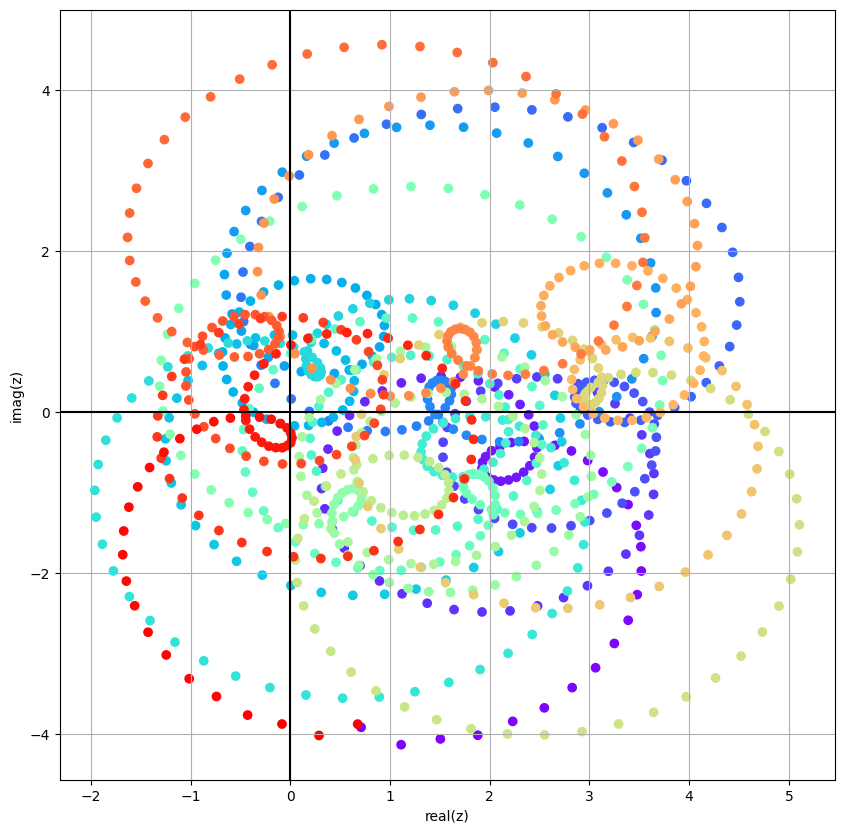

In [16]:
scatter_z(z3)

## Amplitude and Frequency Modulation

### Amplitude modulated signal

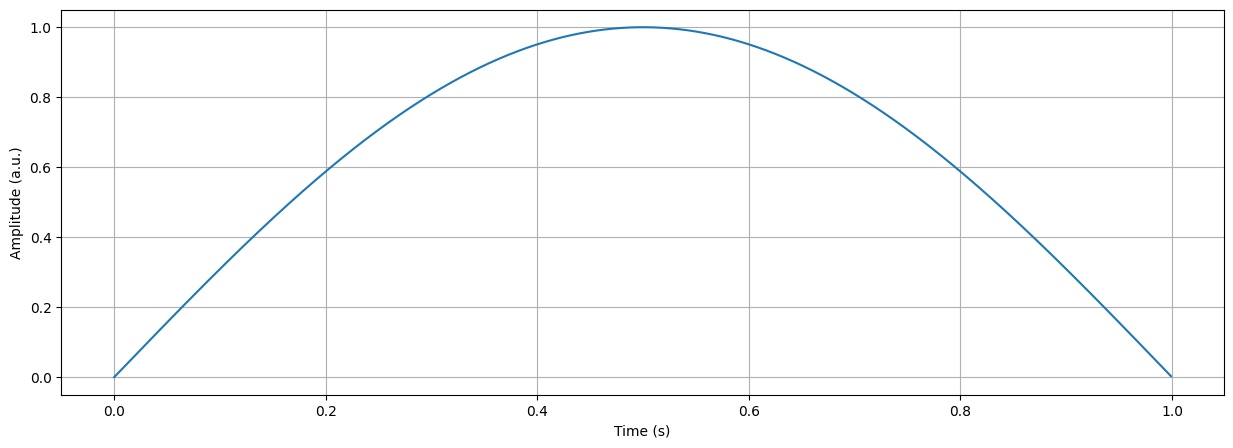

In [17]:
# amplitude modulated signal: combination of two signals

# modulator: signal we want to transmit (actual interesting signal)
fm = 0.5

'''
Try both signals xm
'''
xm = np.sin(2*np.pi*fm/fs*n)
#xm = np.arange(N)/N 

plot_x(xm,t)

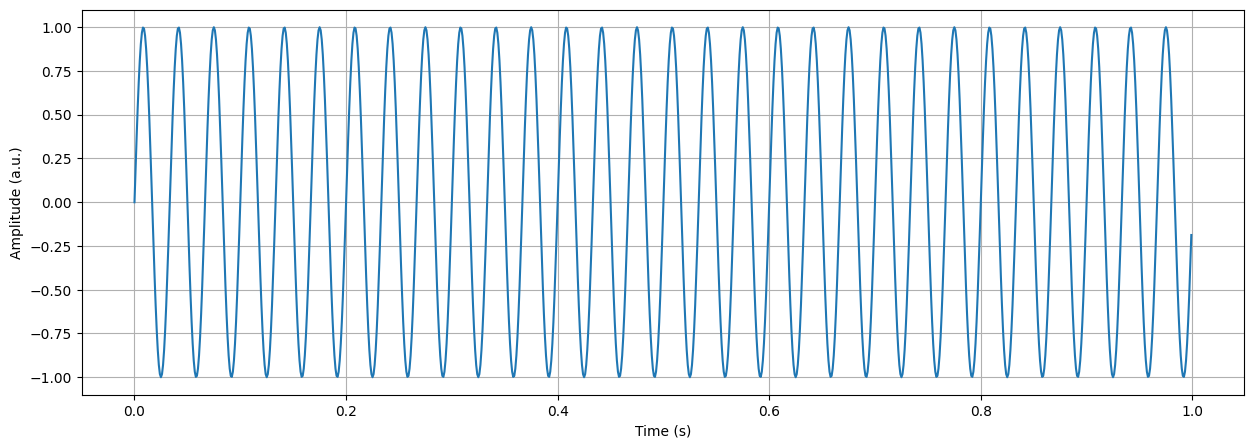

In [18]:
# carrier: signal, that carries our interesting signal (transfer interesting signal)
fc = 30
xc = np.sin(2*np.pi*fc/fs*n)

plot_x(xc,t)

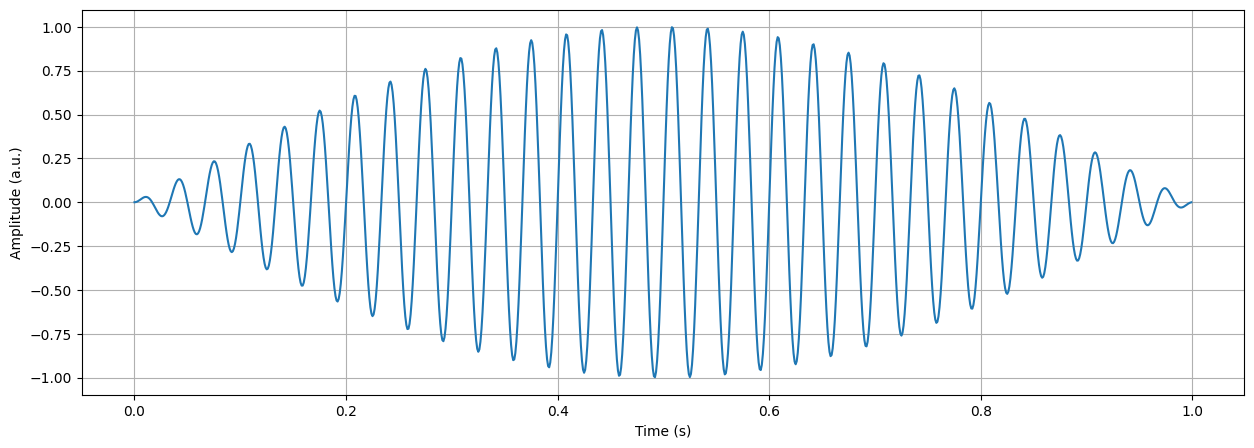

'same osciallations as carrier\nsame shape (amplitude) we want to transmit'

In [19]:
# Amplitdue modulated signal
x_am = xc * xm

plot_x(x_am, t)

'''same osciallations as carrier
same shape (amplitude) we want to transmit'''

'\ninst amp (envelope) has the shape of our signal of interest\nuse carrier signal to transmit it, not interested in osciallations\ninst freq: edge effects at beginning and end (signal is not infinitely long)\n'

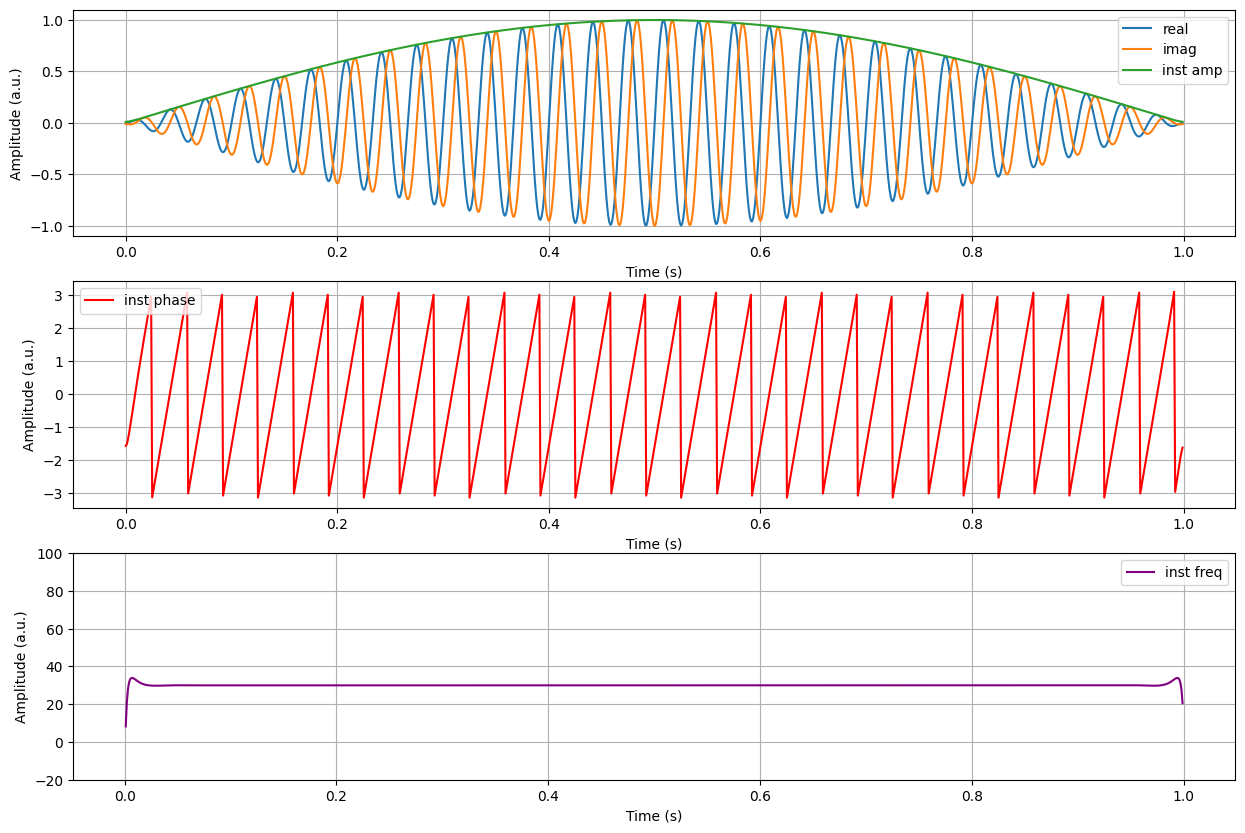

In [20]:
z_am = analytic_signal(x_am)
plot_z(z_am, t, fs, [-20,100])

'''
inst amp (envelope) has the shape of our signal of interest
use carrier signal to transmit it, not interested in osciallations
inst freq: edge effects at beginning and end (signal is not infinitely long)
'''

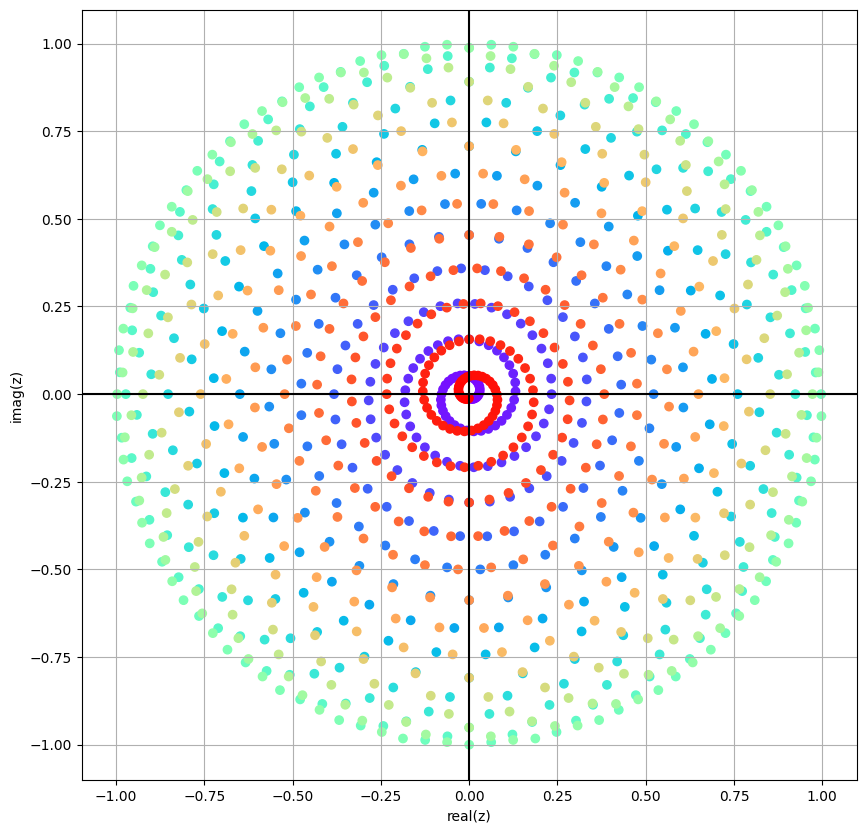

'\n signal starts at zero --> amplitude gets bigger --> amplitude gets smaller again\n'

In [21]:
scatter_z(z_am)

'''
 signal starts at zero --> amplitude gets bigger --> amplitude gets smaller again
'''

### Frequency Modulation

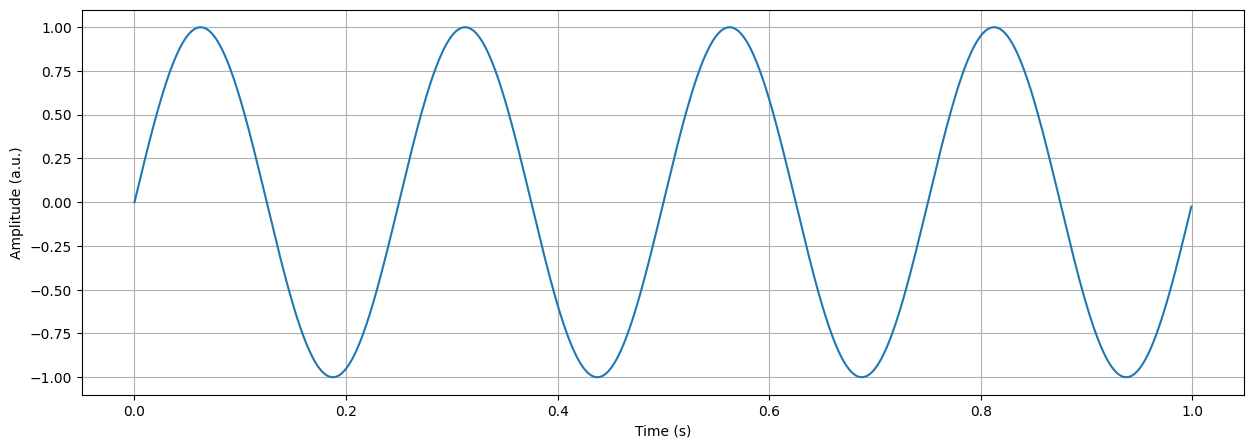

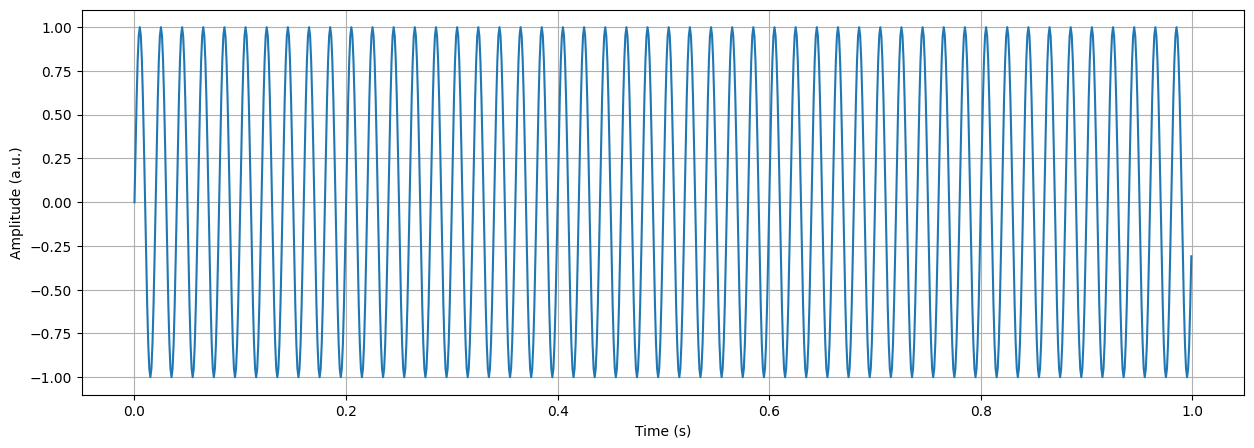

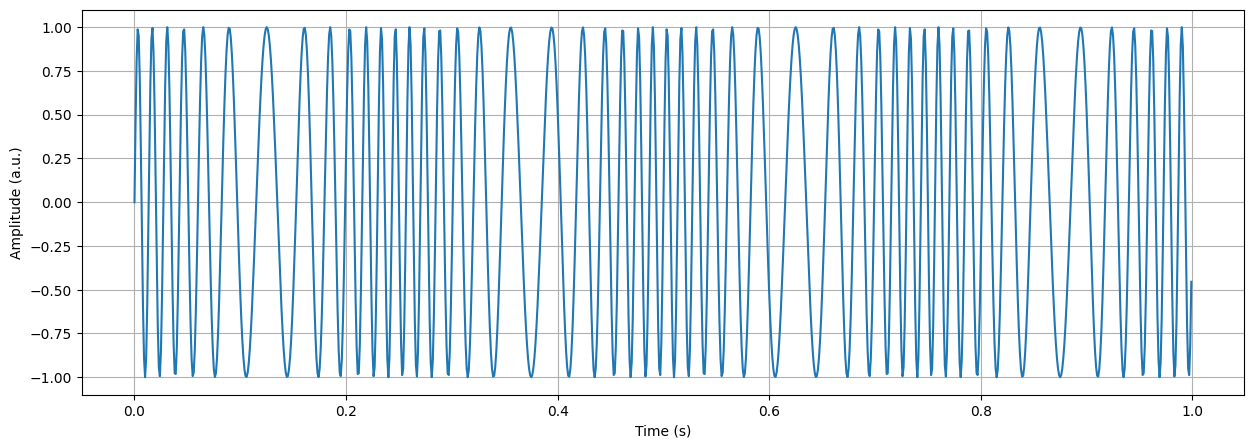

'\nfrequency does not change gradually --> slope of modulator signal determines the frequency of x_fm\npositive slope --> increase frequency\nnegative slope --> decrease frequency\n'

In [22]:
# frequency modulated signal

# modulator
fm = 4

'''
Try both signals xm
'''
# xm = np.zeros(N)
# xm[0:250] = np.arange(250)/250
# xm[250:750] = np.arange(250,-250,-1)/250
# xm[750:] = np.arange(-250,0)/250

xm = np.sin(2*np.pi*(fm/fs*n))


# carrier
fc = 50
xc = np.sin(2*np.pi*fc/fs*n) # xc is not used any further since 

# modulation factor: modulate frequency mf times stronger
mf = 1

# add modulator signal to phase of carrier signal
x_fm = np.sin(2*np.pi*fc/fs*n + 2*np.pi*xm*mf)

# Modulator signal
plot_x(xm,t)
# Carrier signal
plot_x(xc,t)

# Frequncy modulated signal
plot_x(x_fm,t)

'''
frequency does not change gradually --> slope of modulator signal determines the frequency of x_fm
positive slope --> increase frequency
negative slope --> decrease frequency
'''

'\ninst. ampl. is constant\ninst. frequency: oscillation, but different (cosine) than modulator signal (sine) --> not a delay\ninst. phase: looks more like the slope of original signal --> take integral\n'

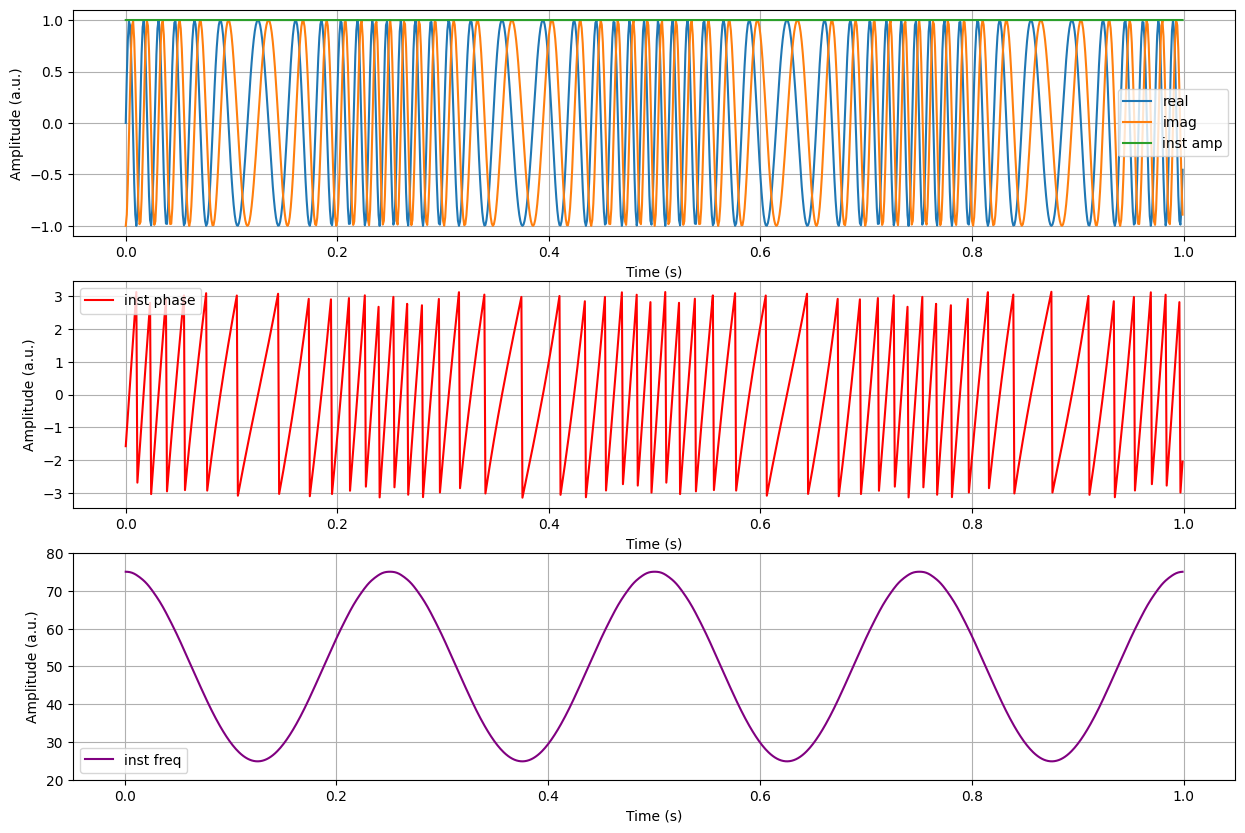

In [23]:
z_fm = analytic_signal(x_fm)
plot_z(z_fm,t,fs,[20,80])

'''
inst. ampl. is constant
inst. frequency: oscillation, but different (cosine) than modulator signal (sine) --> not a delay
inst. phase: looks more like the slope of original signal --> take integral
'''

### Demodulate signal

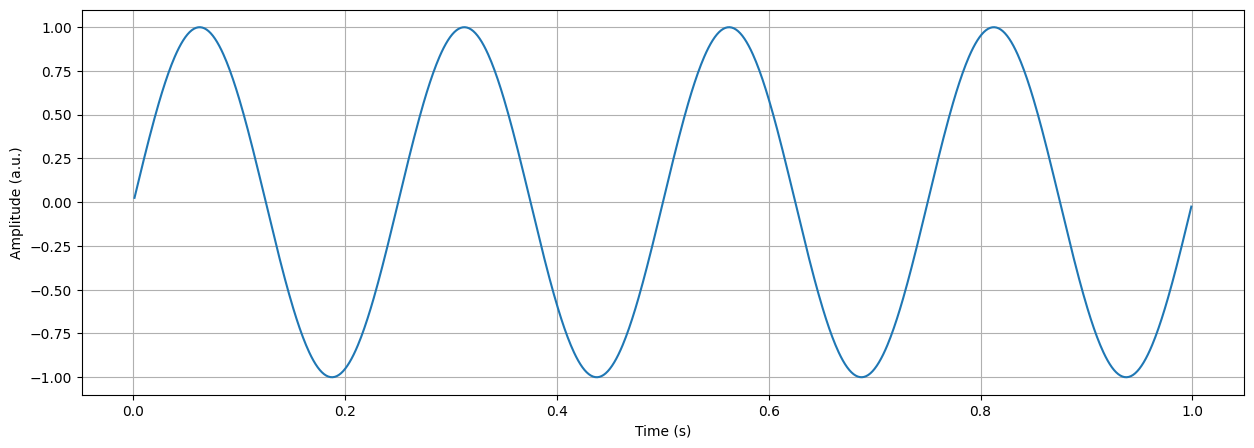

In [24]:
# Calculate inst. frequency
inst_freq = np.diff(np.unwrap(np.angle(z_fm))) / (2*np.pi)*fs
# Demodulate
'''
integral(discrete) = cumulative sum divided by length (and modulator factor),
subtract carrier frequency
'''
xm_demod = np.cumsum((inst_freq-fc)) / fs / mf 

plot_x(xm_demod,t[1:])


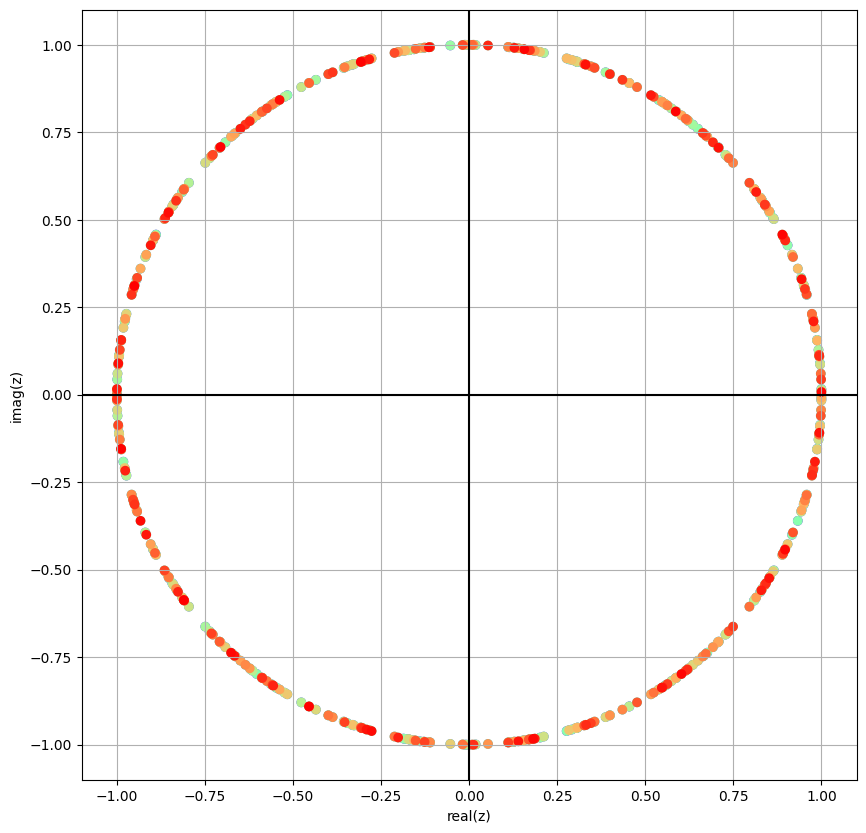

In [25]:
scatter_z(z_fm)